# Correlation Tests

Statistical tests that you can use to check if two samples are related. 

Variable Relationship Tests (correlation)

1. Chi-Squared Test
2. Pearson’s Correlation Coefficient
3. Spearman’s Rank Correlation
4. Kendall’s Rank Correlation

## 1. Chi-Squared Test
Tests whether two categorical variables are related or independent.
Also known as "Karl Pearson Test"

In [3]:
'''
#### Definition
A test for independence between categorical variables, it tests for an association of significance between
two categorical variables in a population sample. Typically used with random sampling.

#### Statistical Understanding :
The chi-square test of independence works by comparing
the categorically coded data that you have collected (known as the observed frequencies) with
the frequencies that you would expect to get in each cell of a table by chance alone (known as the expected frequencies).

Null hypothesis (H0): The observed frequencies for a categorical variable match the expected frequencies for
the categorical variable.

Alternate hypothesis (H1): The observed frequencies for a categorical variable does not match the expected frequencies for
the categorical variable.

#### Contingency Table:
A table summarization of two categorical variables.
e.g.
        Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30

## Assumptions
Observations used in the calculation of the contingency table are independent.
25 or more examples in each cell of the contingency table.

## Interpretation
H0: the two samples are independent.
H1: there is a dependency between the samples.

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.\

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

#### Application:
While doing feature selection in applied machine learning, it determines whether input features are relevant to
the outcome to be predicted.

## Python Code
# Example of the Chi-Squared Test
'''
from scipy.stats import chisquare, chi2_contingency, chi2

# chisquare : Calculate a one-way chi-square test.
# chi2_contingency : Chi-square test of independence of variables in a contingency table.
# chi2 : A chi-squared continuous random variable.

In [2]:
# When just `f_obs` is given, it is assumed that the expected frequencies are uniform and
# given by the mean of the observed frequencies.

print(chisquare([16, 18, 16, 14, 12, 12]))

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)


In [3]:
# With f_exp the expected frequencies can be given.

print(chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8]))

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)


In [4]:
# When f_obs is 2-D, by default the test is applied to each column.
import numpy as np

obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(chisquare(obs))

# By setting axis=None, the test is applied to all data in the array,
# which is equivalent to applying the test to the flattened array.

print(chisquare(obs, axis=None))
print(chisquare(obs.ravel()))

Power_divergenceResult(statistic=array([2.        , 6.66666667]), pvalue=array([0.84914504, 0.24663415]))
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)
Power_divergenceResult(statistic=23.310344827586206, pvalue=0.01597569253412758)


In [5]:
# ddof is the change to make to the default degrees of freedom.

print(chisquare([16, 18, 16, 14, 12, 12], ddof=1))

Power_divergenceResult(statistic=2.0, pvalue=0.7357588823428847)


In [6]:
# The calculation of the p-values is done by broadcasting the chi-squared statistic with ddof.

print(chisquare([16, 18, 16, 14, 12, 12], ddof=[0,1,2]))

Power_divergenceResult(statistic=2.0, pvalue=array([0.84914504, 0.73575888, 0.5724067 ]))


In [7]:
# f_obs and f_exp are also broadcast. In the following, f_obs has shape (6,) and f_exp has shape (2, 6),
# so the result of broadcasting f_obs and f_exp has shape (2, 6). To compute the desired chi-squared statistics,
# we use axis=1:

print(chisquare([16, 18, 16, 14, 12, 12], f_exp=[[16, 16, 16, 16, 16, 8], [8, 20, 20, 16, 12, 12]], axis=1))

Power_divergenceResult(statistic=array([3.5 , 9.25]), pvalue=array([0.62338763, 0.09949846]))


# chi-squared test with similar proportions

In [7]:
# contingency table
table = [[10, 20, 30],
         [6,  9,  17]]

In [8]:
stat, p, dof, expected = chi2_contingency(table)

# degrees of freedom: (rows - 1) * (cols - 1) = (2-1)*(3-1) = 1*2 = 2
print('stat=%.3f, p=%.3f' % (stat, p))
print('dof=%d' % dof)
print(expected)

stat=0.272, p=0.873
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [9]:
# interpret test-statistic
prob = 0.95

critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)


In [11]:
# interpret p-value
alpha = 1.0 - prob

print('significance=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)


## 2. Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

In [24]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

## Interpretation
H0: the two samples are independent.
H1: there is a dependency between the samples.

## Python Code
# Example of the Pearson's Correlation test
'''
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


## 3. Spearman’s Rank Correlation
Tests whether two samples have a monotonic relationship.

In [23]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.

## Interpretation
H0: the two samples are independent.
H1: there is a dependency between the samples.

## Python Code
# Example of the Spearman's Rank Correlation Test
'''
from scipy.stats import spearmanr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


## 4. Kendall’s Rank Correlation
Tests whether two samples have a monotonic relationship.

In [ ]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.

## Interpretation
H0: the two samples are independent.
H1: there is a dependency between the samples.

## Python Code
# Example of the Kendall's Rank Correlation Test
'''
from scipy.stats import kendalltau

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

# Correlation Analysis

Correlation is the statistical summary of the relationship between two variables.

1. Covariance
2. Pearson’s Correlation
3. Spearman’s Correlation

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


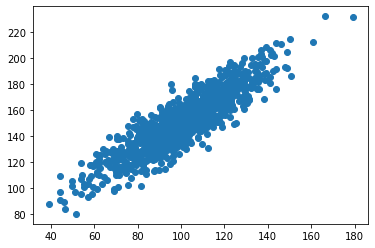

In [17]:
'''
Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity.
'''

# generate related variables
import numpy as np
import matplotlib.pyplot as plt

# seed random number generator
np.random.seed(1)

# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

## 1. Covariance

Variables can be related by a linear relationship that is consistently additive across the two data samples.

In [13]:
'''
This relationship can be summarized between two variables, called the covariance.
It is calculated as the average of the product between the values from each sample,
where the values haven been centered (had their mean subtracted).

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive)
or change in different directions (negative).

The magnitude of the covariance is not easily interpreted.

A covariance value of zero indicates that both variables are completely independent.

The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize
the relationships between two or more variables.

## calculate covariance matrix
'''
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


## 2. Pearson’s Correlation Coefficient

Used to summarize the strength of the linear relationship between two data samples, named for Karl Pearson.

In [15]:
'''
The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by
the product of the standard deviation of each data sample.

It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The coefficient returns a value between -1 and 1 that represents
the limits of correlation from a full negative correlation to a full positive correlation.

A value of 0 means no correlation.

The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation,
and values below those values suggests a less notable correlation.

# calculate Pearson's correlation
'''
from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


## 3. Spearman’s Correlation Coefficient

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables, named for Charles Spearman.

In [16]:
'''
Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient can be used to summarize the strength between the two data samples.
This test of relationship can also be used if there is a linear relationship between the variables,
but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for
perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves,
these statistics are calculated from the relative rank of values on each sample.
This is a common approach used in non-parametric statistics,
e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

If you are unsure of the distribution and possible relationships between two variables,
Spearman correlation coefficient is a good tool to use.

# calculate spearman's correlation
'''
from scipy.stats import spearmanr

corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


# Nonparametric Rank Correlation

1. Spearman’s Rank Correlation.
2. Kendall’s Rank Correlation.
3. Goodman and Kruskal’s Rank Correlation.
4. Somers’ Rank Correlation.

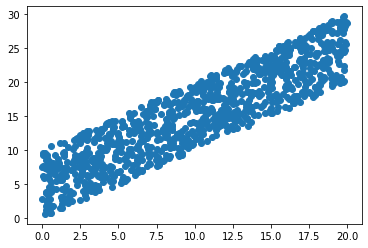

In [18]:
'''
Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between
the values rather than the specific values.

Ordinal data is data that has label values and has an order or rank relationship; for example: ‘low‘, ‘medium‘, and ‘high‘.

Because no distribution for the values is assumed, rank correlation methods are referred to as
distribution-free correlation or nonparametric correlation.
'''
# generate related variables
import numpy as np
import matplotlib.pyplot as plt

# seed random number generator
np.random.seed(1)

# prepare data
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)

# plot
plt.scatter(data1, data2)
plt.show()

## 1. Spearman’s Rank Correlation

It may also be called Spearman’s correlation coefficient and is denoted by the lowercase greek letter rho (p).
As such, it may be referred to as Spearman’s rho, named for Charles Spearman.

In [19]:
'''
This statistical method quantifies the degree to which ranked variables are associated by a monotonic function,
meaning an increasing or decreasing relationship.
As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between
two variables on an ordinal scale of measurement.

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation
(e.g. a parametric measure of correlation) using the rank values instead of the real values.
Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean)
between the two variables normalized by the variance or spread of both variables.

The function takes two real-valued samples as arguments and returns both the correlation coefficient
in the range between -1 and 1 and the p-value for interpreting the significance of the coefficient.

# calculate the spearman's correlation between two variables
'''
from scipy.stats import spearmanr

coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


## 2. Kendall’s Rank Correlation

It is also called Kendall’s correlation coefficient, and the coefficient is often referred to by the lowercase Greek letter tau (t).
In turn, the test may be called Kendall’s tau, named for Maurice Kendall.

In [20]:
'''
The intuition for the test is that it calculates a normalized score for the number of matching or
concordant rankings between the two samples. As such, the test is also referred to as Kendall’s concordance test.

# calculate the kendall's correlation between two variables
'''
from scipy.stats import kendalltau

coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


## 3. Goodman and Kruskal’s Rank Correlation

Goodman and Kruskal's gamma is a measure of rank correlation, i.e., the similarity of the orderings of the data when ranked by each of the quantities, named after Leo Goodman and William Kruskal.

In [22]:
'''
It measures the strength of association of the cross tabulated data when both variables are measured at the ordinal level.
It makes no adjustment for either table size or ties.

Values range from −1 (100% negative association, or perfect inversion) to +1 (100% positive association, or perfect agreement).

A value of zero indicates the absence of association.
'''

'\nIt measures the strength of association of the cross tabulated data when both variables are measured at the ordinal level.\nIt makes no adjustment for either table size or ties.\n\nValues range from −1 (100% negative association, or perfect inversion) to +1 (100% positive association, or perfect agreement).\n\nA value of zero indicates the absence of association.\n'

## 4. Somers’ D Rank Correlation

Somers’ D, is a measure of ordinal association between two possibly dependent random variables X and Y, named after Robert H. Somers.

In [21]:
'''
Somers’ D takes values between -1 when all pairs of the variables disagree and 1 when all pairs of the variables agree

Somers’ D plays a central role in rank statistics and is the parameter behind many nonparametric methods.

It is also used as a quality measure of binary choice or ordinal regression (e.g., logistic regressions) and
credit scoring models.
'''

'\nSomers’ D takes values between -1 when all pairs of the variables disagree and 1 when all pairs of the variables agree\n\nSomers’ D plays a central role in rank statistics and is the parameter behind many nonparametric methods.\n\nIt is also used as a quality measure of binary choice or ordinal regression (e.g., logistic regressions) and\ncredit scoring models.\n'